In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

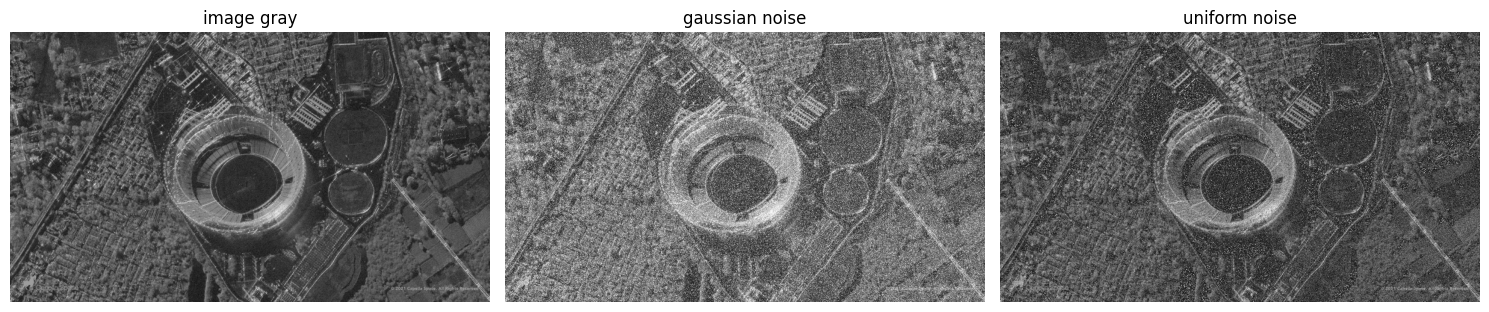

In [2]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
noise_gauss_image = cv2.add(image_gray, noise_gauss)

low = -50
high = 50
noise_uniform = np.random.uniform(low, high, image_gray.shape).astype(np.uint8)
noise_uniform_image = np.clip(image_gray.astype(np.uint8) + noise_uniform, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(image_gray, cmap='gray'); plt.title('image gray'); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(noise_gauss_image, cmap='gray'); plt.title('gaussian noise'); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(noise_uniform_image, cmap='gray'); plt.title('uniform noise'); plt.axis('off')
plt.tight_layout()
plt.show()

# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [3]:
def metrics(original, filtered, filter_name):
    mse = mean_squared_error(original, filtered)
    ssim, _ = structural_similarity(original, filtered, full=True)
    print(f"{filter_name}: MSE = {mse:.2f}, SSIM = {ssim:.4f}")
    return mse, ssim

Median 3x3: MSE = 1038.05, SSIM = 0.4282
Median 5x5: MSE = 706.03, SSIM = 0.4702
Median 7x7: MSE = 682.57, SSIM = 0.4336


(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

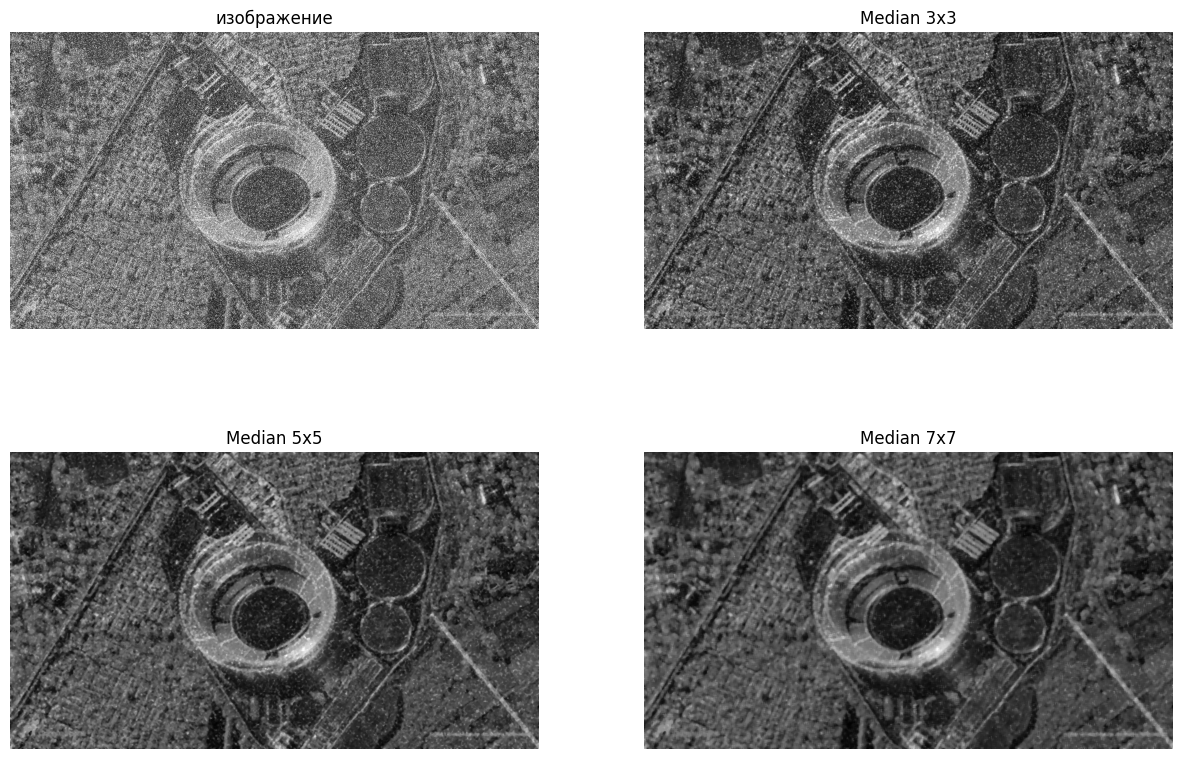

In [4]:
# Медианный

image_median_3 = cv2.medianBlur(noise_gauss_image, 3)
image_median_5 = cv2.medianBlur(noise_gauss_image, 5)
image_median_7 = cv2.medianBlur(noise_gauss_image, 7)

mse_3, ssim_3 = metrics(image_gray, image_median_3, "Median 3x3")
mse_5, ssim_5 = metrics(image_gray, image_median_5, "Median 5x5")
mse_7, ssim_7 = metrics(image_gray, image_median_7, "Median 7x7")

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1); plt.imshow(noise_gauss_image, cmap='gray'); plt.title('изображение'); plt.axis('off')
plt.subplot(2, 2, 2); plt.imshow(image_median_3, cmap='gray'); plt.title('Median 3x3'); plt.axis('off')
plt.subplot(2, 2, 3); plt.imshow(image_median_5, cmap='gray'); plt.title('Median 5x5'); plt.axis('off')
plt.subplot(2, 2, 4); plt.imshow(image_median_7, cmap='gray'); plt.title('Median 7x7'); plt.axis('off')

Gaussian 3x3 sigma=0: MSE = 1903.45, SSIM = 0.4403
Gaussian 5x5 sigma=0: MSE = 1764.64, SSIM = 0.4860
Gaussian 7x7 sigma=0: MSE = 1721.20, SSIM = 0.4925
Gaussian 3x3 sigma=1: MSE = 1869.96, SSIM = 0.4488
Gaussian 3x3 sigma=2: MSE = 1850.78, SSIM = 0.4450
Gaussian 5x5 sigma=1: MSE = 1778.36, SSIM = 0.4819
Gaussian 5x5 sigma=2: MSE = 1736.81, SSIM = 0.4732
Gaussian 7x7 sigma=1: MSE = 1771.65, SSIM = 0.4842
Gaussian 7x7 sigma=2: MSE = 1726.26, SSIM = 0.4678


(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

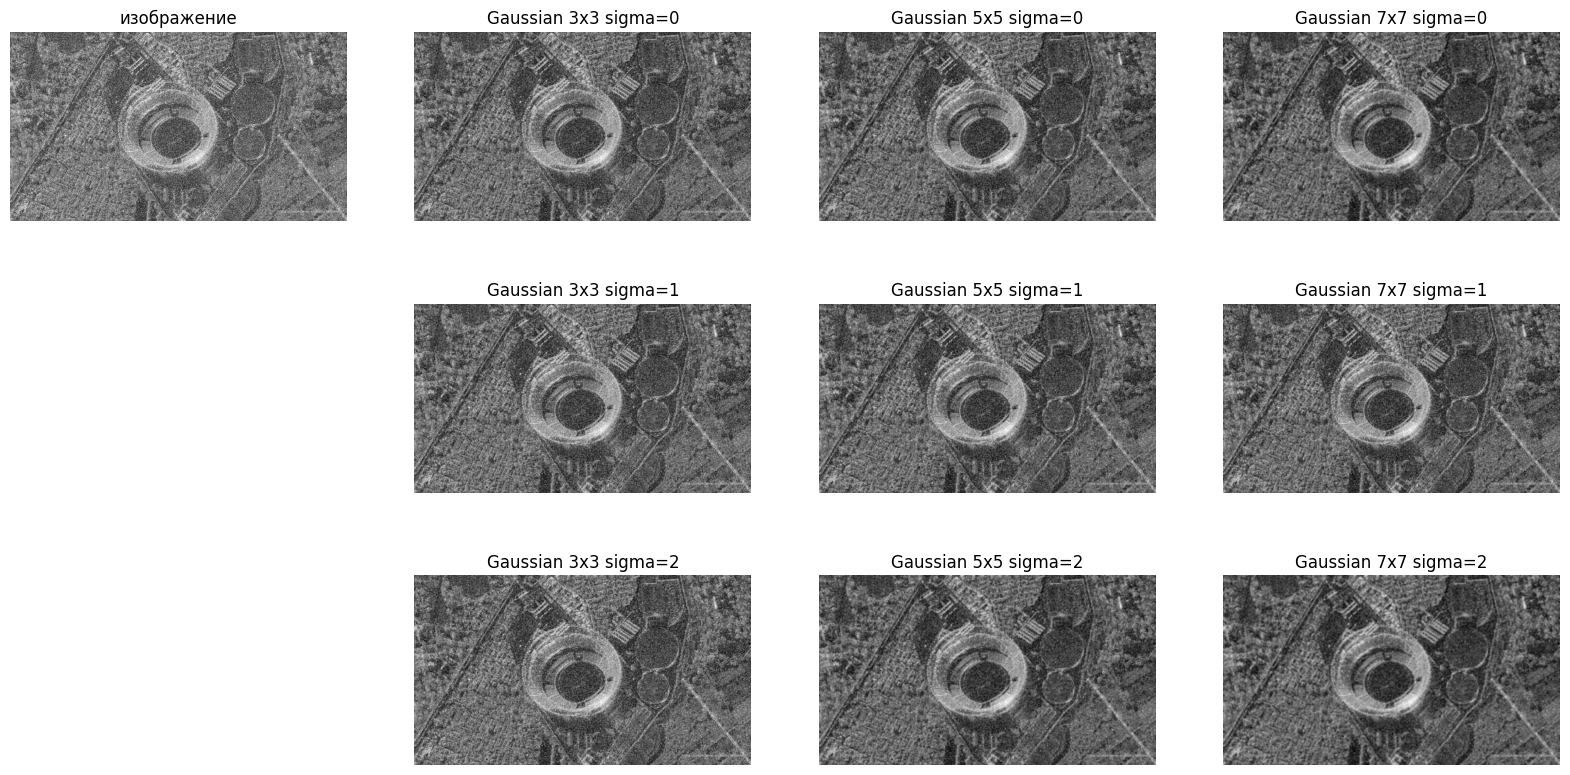

In [5]:
# Гаусс

image_gauss_3 = cv2.GaussianBlur(noise_gauss_image, (3, 3), 0)
image_gauss_5 = cv2.GaussianBlur(noise_gauss_image, (5, 5), 0)
image_gauss_7 = cv2.GaussianBlur(noise_gauss_image, (7, 7), 0)

image_gauss_3_s1 = cv2.GaussianBlur(noise_gauss_image, (3, 3), 1)
image_gauss_3_s2 = cv2.GaussianBlur(noise_gauss_image, (3, 3), 2)

image_gauss_5_s1 = cv2.GaussianBlur(noise_gauss_image, (5, 5), 1)
image_gauss_5_s2 = cv2.GaussianBlur(noise_gauss_image, (5, 5), 2)

image_gauss_7_s1 = cv2.GaussianBlur(noise_gauss_image, (7, 7), 1)
image_gauss_7_s2 = cv2.GaussianBlur(noise_gauss_image, (7, 7), 2)

mse_g3, ssim_g3 = metrics(image_gray, image_gauss_3, "Gaussian 3x3 sigma=0")
mse_g5, ssim_g5 = metrics(image_gray, image_gauss_5, "Gaussian 5x5 sigma=0")
mse_g7, ssim_g7 = metrics(image_gray, image_gauss_7, "Gaussian 7x7 sigma=0")

mse_g3s1, ssim_g3s1 = metrics(image_gray, image_gauss_3_s1, "Gaussian 3x3 sigma=1")
mse_g3s2, ssim_g3s2 = metrics(image_gray, image_gauss_3_s2, "Gaussian 3x3 sigma=2")

mse_g5s1, ssim_g5s1 = metrics(image_gray, image_gauss_5_s1, "Gaussian 5x5 sigma=1")
mse_g5s2, ssim_g5s2 = metrics(image_gray, image_gauss_5_s2, "Gaussian 5x5 sigma=2")

mse_g7s1, ssim_g7s1 = metrics(image_gray, image_gauss_7_s1, "Gaussian 7x7 sigma=1")
mse_g7s2, ssim_g7s2 = metrics(image_gray, image_gauss_7_s2, "Gaussian 7x7 sigma=2")

plt.figure(figsize=(20, 10))
plt.subplot(3, 4, 1); plt.imshow(noise_gauss_image, cmap='gray'); plt.title('изображение'); plt.axis('off')
plt.subplot(3, 4, 2); plt.imshow(image_gauss_3, cmap='gray'); plt.title('Gaussian 3x3 sigma=0'); plt.axis('off')
plt.subplot(3, 4, 3); plt.imshow(image_gauss_5, cmap='gray'); plt.title('Gaussian 5x5 sigma=0'); plt.axis('off')
plt.subplot(3, 4, 4); plt.imshow(image_gauss_7, cmap='gray'); plt.title('Gaussian 7x7 sigma=0'); plt.axis('off')
plt.subplot(3, 4, 6); plt.imshow(image_gauss_3_s1, cmap='gray'); plt.title('Gaussian 3x3 sigma=1'); plt.axis('off')
plt.subplot(3, 4, 7); plt.imshow(image_gauss_5_s1, cmap='gray'); plt.title('Gaussian 5x5 sigma=1'); plt.axis('off')
plt.subplot(3, 4, 8); plt.imshow(image_gauss_7_s1, cmap='gray'); plt.title('Gaussian 7x7 sigma=1'); plt.axis('off')
plt.subplot(3, 4, 10); plt.imshow(image_gauss_3_s2, cmap='gray'); plt.title('Gaussian 3x3 sigma=2'); plt.axis('off')
plt.subplot(3, 4, 11); plt.imshow(image_gauss_5_s2, cmap='gray'); plt.title('Gaussian 5x5 sigma=2'); plt.axis('off')
plt.subplot(3, 4, 12); plt.imshow(image_gauss_7_s2, cmap='gray'); plt.title('Gaussian 7x7 sigma=2'); plt.axis('off')

Bilateral 1: MSE = 2655.60, SSIM = 0.2276
Bilateral 2: MSE = 1837.55, SSIM = 0.3145
Bilateral 3: MSE = 1583.98, SSIM = 0.3375
Bilateral 4: MSE = 3872.58, SSIM = 0.1847


(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

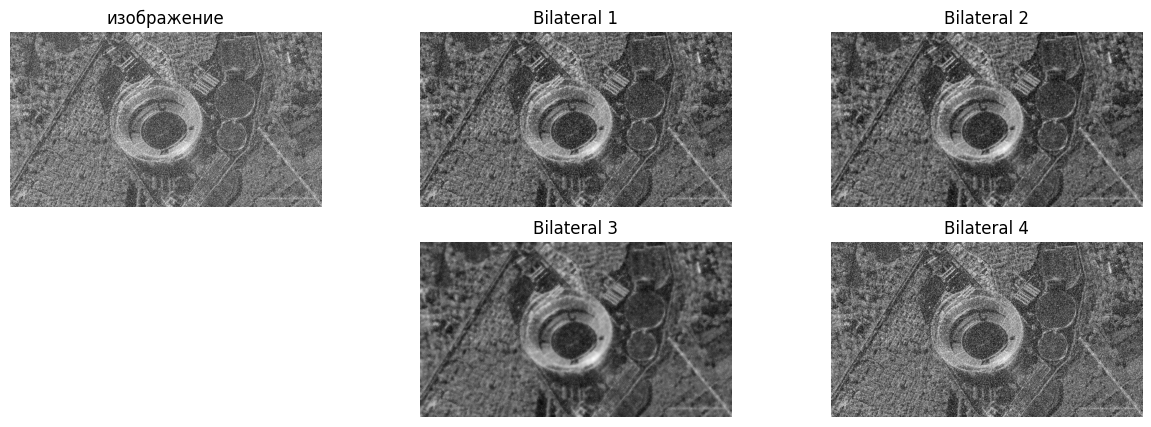

In [6]:
# Билатериальный

image_bilat_1 = cv2.bilateralFilter(noise_gauss_image, 9, 50, 50)
image_bilat_2 = cv2.bilateralFilter(noise_gauss_image, 9, 75, 75)
image_bilat_3 = cv2.bilateralFilter(noise_gauss_image, 15, 100, 100)
image_bilat_4 = cv2.bilateralFilter(noise_gauss_image, 5, 25, 25)

mse_b1, ssim_b1 = metrics(image_gray, image_bilat_1, "Bilateral 1")
mse_b2, ssim_b2 = metrics(image_gray, image_bilat_2, "Bilateral 2")
mse_b3, ssim_b3 = metrics(image_gray, image_bilat_3, "Bilateral 3")
mse_b4, ssim_b4 = metrics(image_gray, image_bilat_4, "Bilateral 4")

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1); plt.imshow(noise_gauss_image, cmap='gray'); plt.title('изображение'); plt.axis('off')
plt.subplot(2, 3, 2); plt.imshow(image_bilat_1, cmap='gray'); plt.title('Bilateral 1'); plt.axis('off')
plt.subplot(2, 3, 3); plt.imshow(image_bilat_2, cmap='gray'); plt.title('Bilateral 2'); plt.axis('off')
plt.subplot(2, 3, 5); plt.imshow(image_bilat_3, cmap='gray'); plt.title('Bilateral 3'); plt.axis('off')
plt.subplot(2, 3, 6); plt.imshow(image_bilat_4, cmap='gray'); plt.title('Bilateral 4'); plt.axis('off')

NLM h=10: MSE = 4230.67, SSIM = 0.1870
NLM h=25: MSE = 4045.85, SSIM = 0.1951
NLM h=30: MSE = 2937.21, SSIM = 0.2536


(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

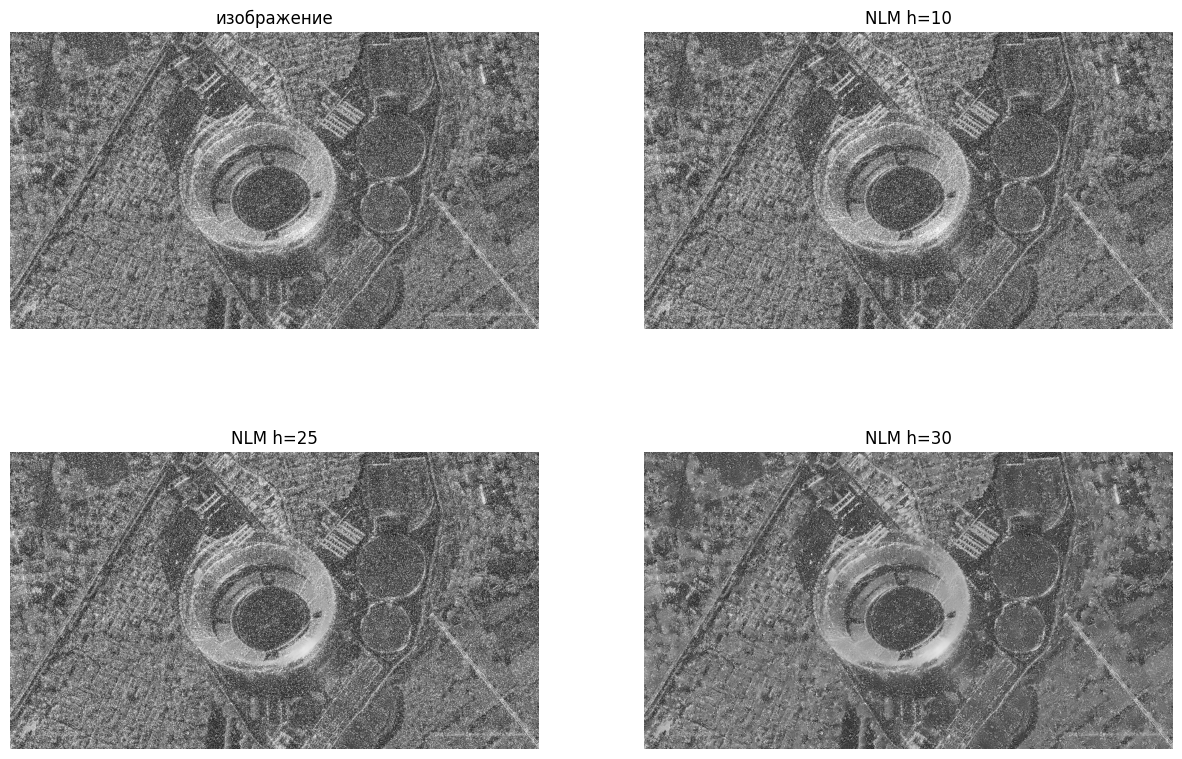

In [7]:
# Нелокальное среднее

image_nlm_1 = cv2.fastNlMeansDenoising(noise_gauss_image, h=10)
image_nlm_2 = cv2.fastNlMeansDenoising(noise_gauss_image, h=25)
image_nlm_3 = cv2.fastNlMeansDenoising(noise_gauss_image, h=30)

mse_n1, ssim_n1 = metrics(image_gray, image_nlm_1, "NLM h=10")
mse_n2, ssim_n2 = metrics(image_gray, image_nlm_2, "NLM h=25")
mse_n3, ssim_n3 = metrics(image_gray, image_nlm_3, "NLM h=30")

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1); plt.imshow(noise_gauss_image, cmap='gray'); plt.title('изображение'); plt.axis('off')
plt.subplot(2, 2, 2); plt.imshow(image_nlm_1, cmap='gray'); plt.title('NLM h=10'); plt.axis('off')
plt.subplot(2, 2, 3); plt.imshow(image_nlm_2, cmap='gray'); plt.title('NLM h=25'); plt.axis('off')
plt.subplot(2, 2, 4); plt.imshow(image_nlm_3, cmap='gray'); plt.title('NLM h=30'); plt.axis('off')

In [8]:
# Сравнение результатов и поиск лучшего
filter_configs = {
    'Median': [
        {'func': lambda img: cv2.medianBlur(img, 3), 'params': '3x3'},
        {'func': lambda img: cv2.medianBlur(img, 5), 'params': '5x5'},
        {'func': lambda img: cv2.medianBlur(img, 7), 'params': '7x7'}
    ],
    'Gaussian': [
        {'func': lambda img: cv2.GaussianBlur(img, (3, 3), 0), 'params': '3x3 sigma=0'},
        {'func': lambda img: cv2.GaussianBlur(img, (3, 3), 1), 'params': '3x3 sigma=1'},
        {'func': lambda img: cv2.GaussianBlur(img, (3, 3), 2), 'params': '3x3 sigma=2'},
        {'func': lambda img: cv2.GaussianBlur(img, (5, 5), 0), 'params': '5x5 sigma=0'},
        {'func': lambda img: cv2.GaussianBlur(img, (5, 5), 1), 'params': '5x5 sigma=1'},
        {'func': lambda img: cv2.GaussianBlur(img, (5, 5), 2), 'params': '5x5 sigma=2'},
        {'func': lambda img: cv2.GaussianBlur(img, (7, 7), 0), 'params': '7x7 sigma=0'},
        {'func': lambda img: cv2.GaussianBlur(img, (7, 7), 1), 'params': '7x7 sigma=1'},
        {'func': lambda img: cv2.GaussianBlur(img, (7, 7), 2), 'params': '7x7 sigma=2'}
    ],
    'Bilateral': [
        {'func': lambda img: cv2.bilateralFilter(img, 9, 50, 50), 'params': 'd=9 c=50 s=50'},
        {'func': lambda img: cv2.bilateralFilter(img, 9, 75, 75), 'params': 'd=9 c=75 s=75'},
        {'func': lambda img: cv2.bilateralFilter(img, 15, 100, 100), 'params': 'd=15 c=100 s=100'}
    ],
    'NLM': [
        {'func': lambda img: cv2.fastNlMeansDenoising(img, h=10), 'params': 'h=10'},
        {'func': lambda img: cv2.fastNlMeansDenoising(img, h=20), 'params': 'h=25'},
        {'func': lambda img: cv2.fastNlMeansDenoising(img, h=30), 'params': 'h=30'}
    ]
}